In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [40]:
df1 = pd.read_csv("C:/Users/user/Downloads/ganti1.csv")
df2 = pd.read_csv("C:/Users/user/Downloads/model_tengah.csv")

In [41]:
df1

id  label
0     4a73abcd02.jpg      0
1     266bdb8d70.jpg      0
2     1389b9fb66.jpg      0
3     7e1c35f2e6.jpg      0
4     8271bebf8f.jpg      1
...              ...    ...
2147  04f17ae096.jpg      0
2148  0d8031f778.jpg      1
2149  413ab0692a.jpg      0
2150  04a668d7be.jpg      0
2151  cff539fcfd.jpg      1

[2152 rows x 2 columns]

In [42]:
df2.columns = ["id", "label2"]

In [43]:
df_merge = pd.merge(df1, df2, how="inner", on="id")

In [44]:
df_merge["is_same"] = df_merge["label"] == df_merge["label2"]

In [75]:
kesimpulan = df_merge[df_merge["is_same"] == False]
kesimpulan.to_csv("kseimpulan.csv")

In [81]:
8 / 2151 * 100

0.3719200371920037

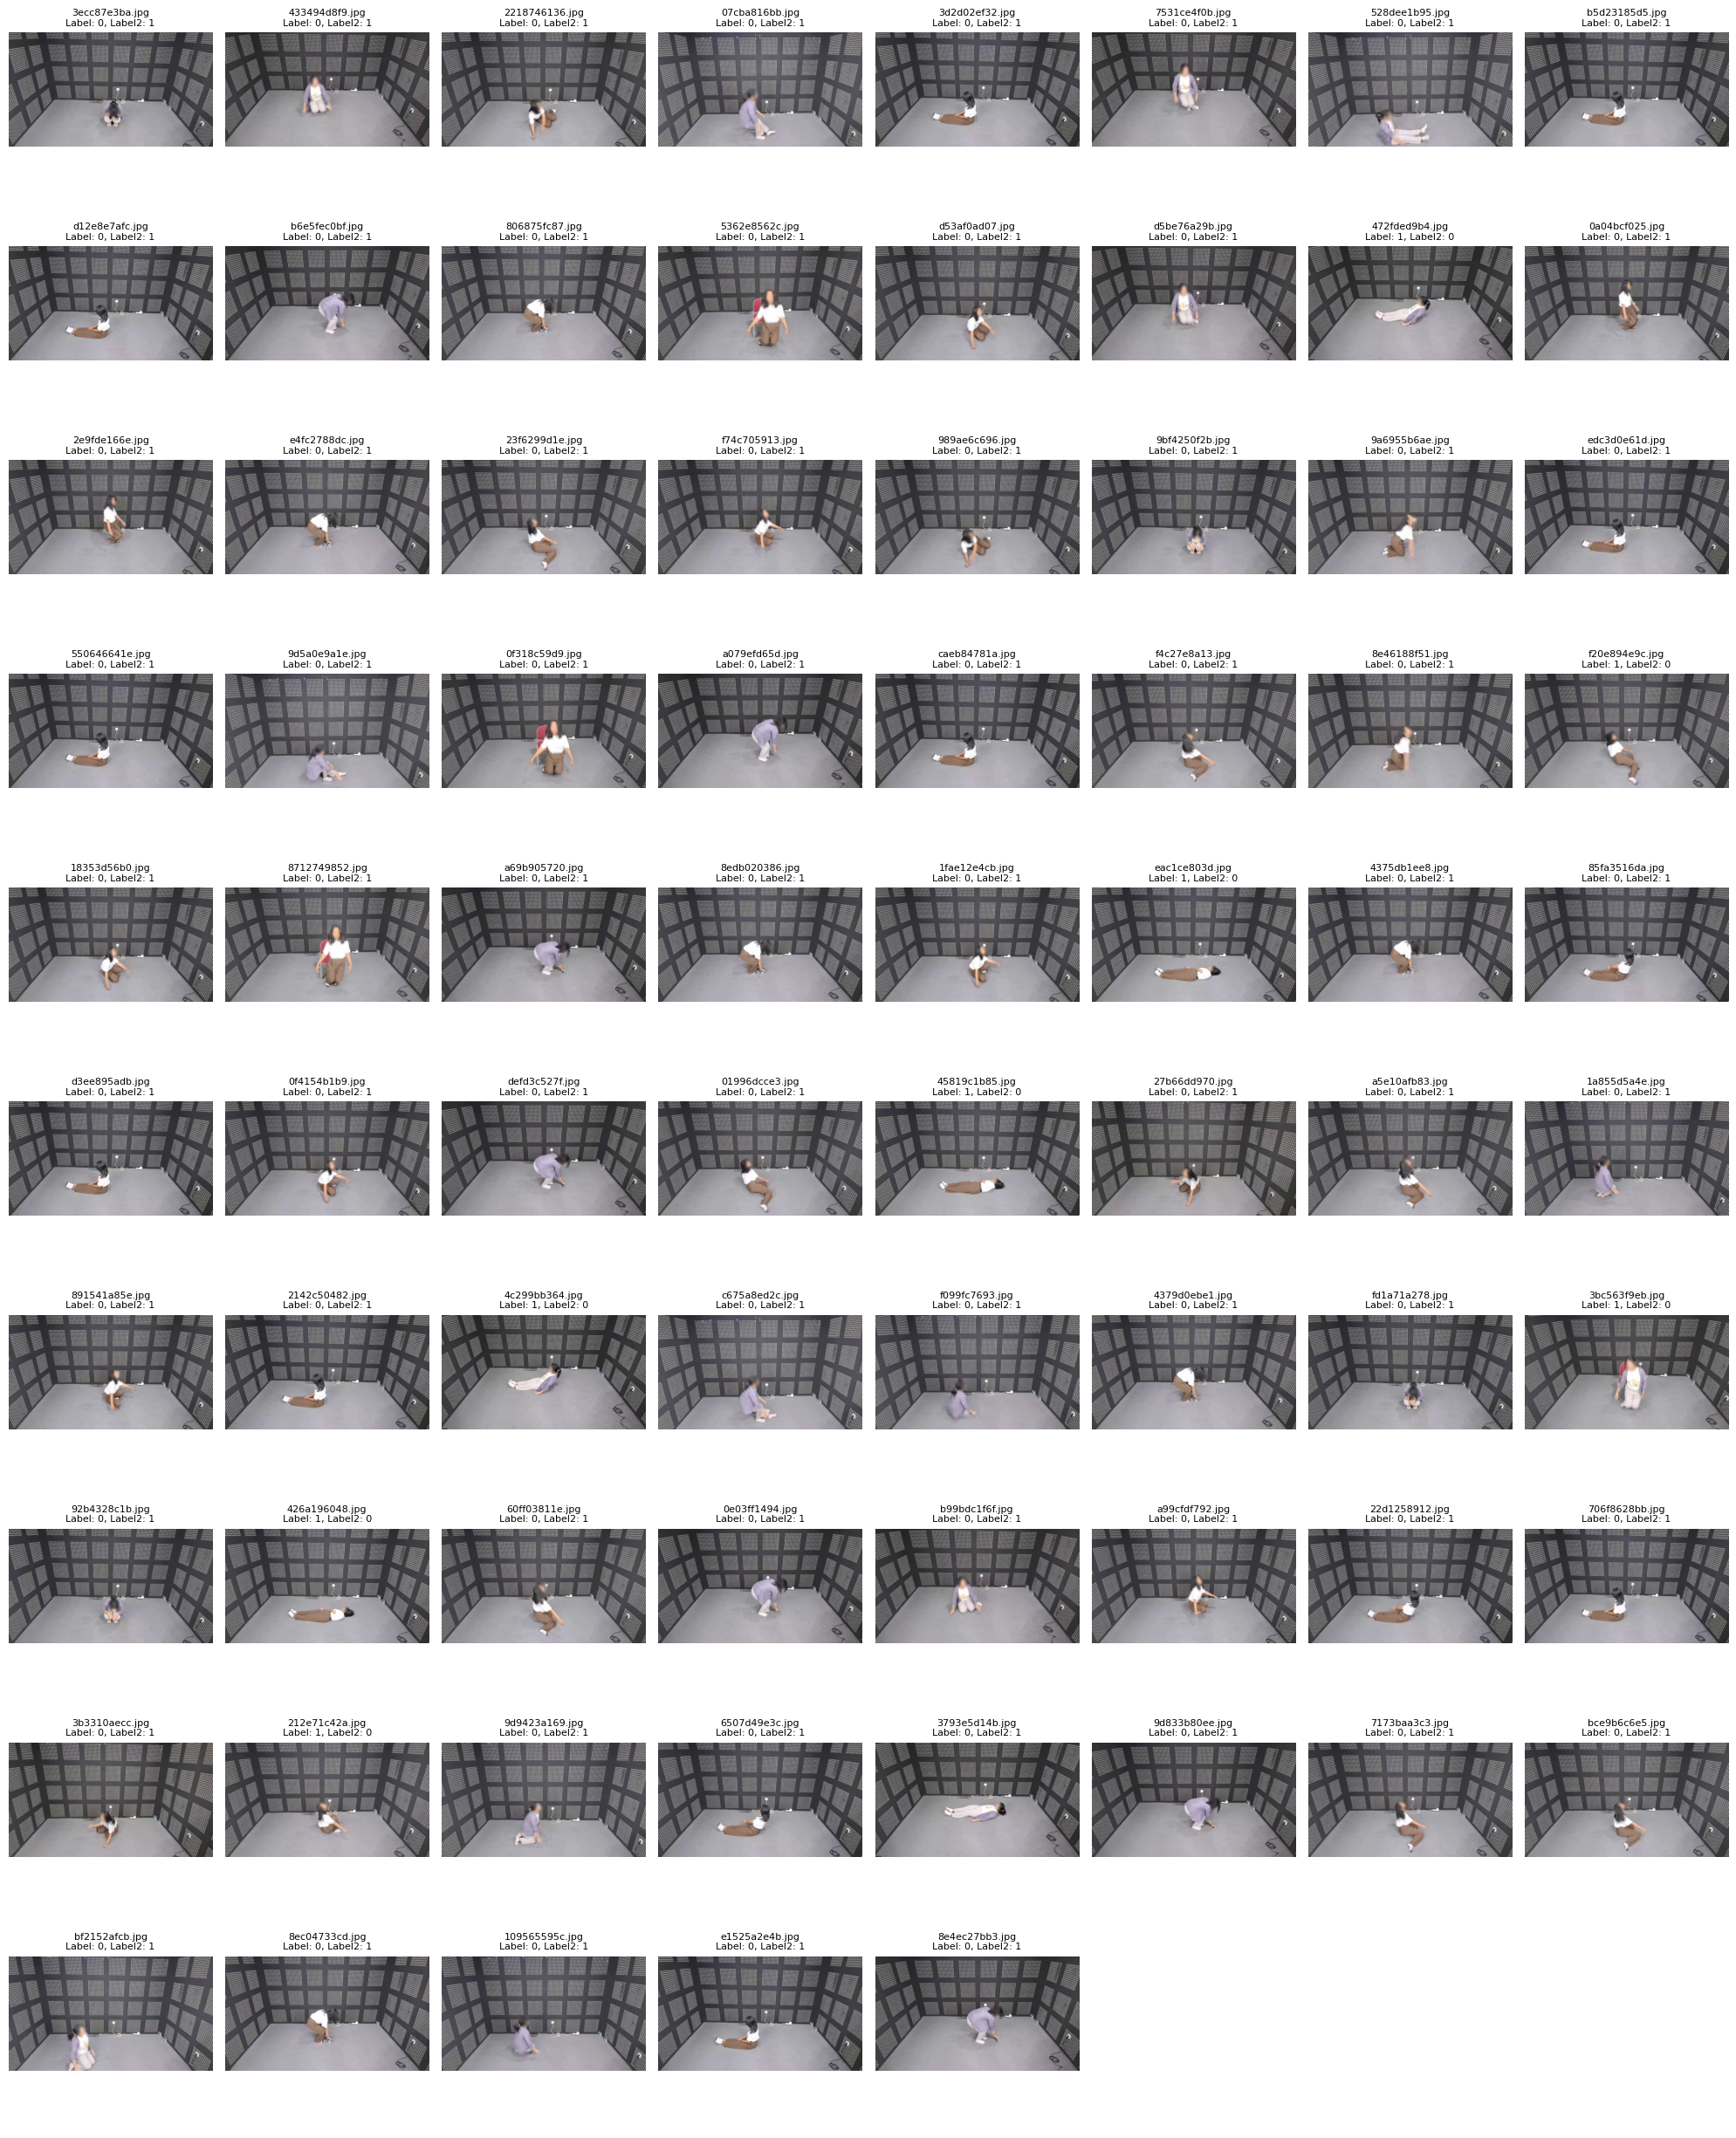

In [73]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import math

# Path ke folder test
folder_path = r"C:/Lomba/Data Slayer/test"  # Pastikan path benar

# Filter dataframe untuk mendapatkan gambar yang ingin ditampilkan
filtered_df = df_merge[df_merge["is_same"] == False]

# Ambil kolom 'id', 'label', dan 'label2' dari dataframe
image_ids = filtered_df['id'].tolist()
labels = filtered_df['label'].tolist()
labels2 = filtered_df['label2'].tolist()

# Fungsi untuk menampilkan banyak gambar dengan grid dinamis
def display_images_with_labels(folder_path, image_ids, labels, labels2):
    num_images = len(image_ids)
    cols = 8  # Menentukan jumlah kolom dalam grid
    rows = math.ceil(num_images / cols)  # Hitung jumlah baris sesuai jumlah gambar
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 2.5))
    axes = axes.ravel()  # Flatten axes agar mudah diakses dalam loop

    for idx, img_id in enumerate(image_ids):
        img_path = os.path.join(folder_path, img_id)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f"{img_id}\nLabel: {labels[idx]}, Label2: {labels2[idx]}", fontsize=8)
        else:
            axes[idx].axis('off')
            axes[idx].set_title(f"{img_id}\nTidak Ditemukan\nLabel: {labels[idx]}, Label2: {labels2[idx]}", fontsize=8)

    # Kosongkan axes yang tidak digunakan
    for idx in range(len(image_ids), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan gambar beserta labelnya
display_images_with_labels(folder_path, image_ids, labels, labels2)
